### Importa√ß√£o dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [4]:
loja1_faturamento = loja['Pre√ßo'].sum()
loja2_faturamento = loja2['Pre√ßo'].sum()
loja3_faturamento = loja3['Pre√ßo'].sum()
loja4_faturamento = loja4['Pre√ßo'].sum()
print('loja1_faturamento:',loja1_faturamento)
print('loja2_faturamento:',loja2_faturamento)
print('loja3_faturamento:',loja3_faturamento)
print('loja4_faturamento:',loja4_faturamento)



loja1_faturamento: 1534509.12
loja2_faturamento: 1488459.06
loja3_faturamento: 1464025.03
loja4_faturamento: 1384497.58


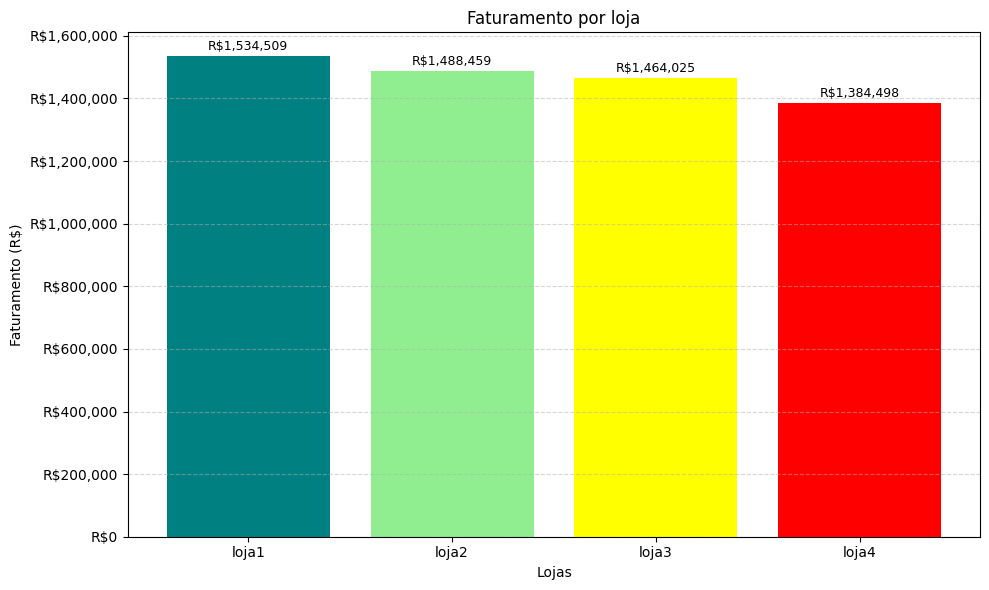

In [5]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

lojas = ['loja1','loja2','loja3','loja4']
faturamento = [1534509.12,1488459.06,1464025.03,1384497.58]

fig, ax = plt.subplots(figsize=(10,6))
barras = ax.bar(lojas, faturamento, color= ['#008080','#90EE90','#FFFF00','#FF0000'])

ax.set_title('Faturamento por loja')
ax.set_xlabel('Lojas')
ax.set_ylabel('Faturamento (R$)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'R${x:,.0f}'))

for barra in barras:
    valor = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, valor + 20000,
            f'R${valor:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


A loja com o menor faturamento foi a loja 4.

# 2. Vendas por Categoria


In [6]:

categorias_loja1 = loja['Categoria do Produto'].value_counts().rename('Loja 1')
categorias_loja2 = loja2['Categoria do Produto'].value_counts().rename('Loja 2')
categorias_loja3 = loja3['Categoria do Produto'].value_counts().rename('Loja 3')
categorias_loja4 = loja4['Categoria do Produto'].value_counts().rename('Loja 4')

vendas_por_categoria = pd.concat([categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4], axis=1)

vendas_por_categoria = vendas_por_categoria.fillna(0).astype(int)

print(" Quantidade de produtos vendidos por categoria em cada loja:")
print(vendas_por_categoria)

 Quantidade de produtos vendidos por categoria em cada loja:
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


Os itens com menos vendas por categoria de produtos foram: instrumentos musicais, livros e utilidades domesticas.

Porcentagem de vendas por loja:
Loja 1: 25.00%
Loja 2: 25.00%
Loja 3: 25.00%
Loja 4: 24.99%

A loja com a menor porcentagem de vendas √© Loja 4 com 24.99% das vendas totais.


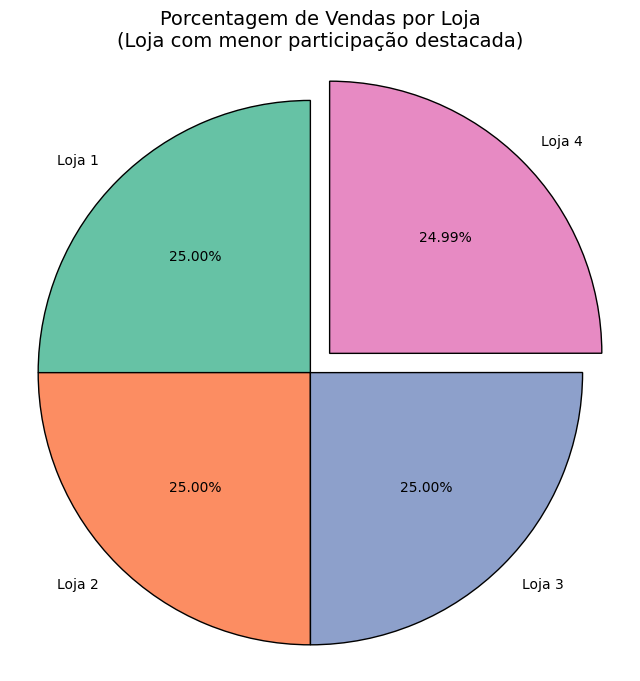

In [7]:

total_vendas = {
    'Loja 1': len(loja),
    'Loja 2': len(loja2),
    'Loja 3': len(loja3),
    'Loja 4': len(loja4)
}

total_vendas_series = pd.Series(total_vendas)

porcentagem_vendas = (total_vendas_series / total_vendas_series.sum()) * 100

print("Porcentagem de vendas por loja:")
for loja_nome, perc in porcentagem_vendas.items():
    print(f"{loja_nome}: {perc:.2f}%")

menor_loja = porcentagem_vendas.idxmin()
menor_valor = porcentagem_vendas.min()
print(f"\nA loja com a menor porcentagem de vendas √© {menor_loja} com {menor_valor:.2f}% das vendas totais.")

cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
explode = [0, 0, 0, 0]

indice_menor = list(porcentagem_vendas.index).index(menor_loja)
explode[indice_menor] = 0.1

plt.figure(figsize=(8, 8))
plt.pie(
    porcentagem_vendas,
    labels=porcentagem_vendas.index,
    autopct=lambda pct: f"{pct:.2f}%",
    startangle=90,
    colors=cores,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Porcentagem de Vendas por Loja\n(Loja com menor participa√ß√£o destacada)', fontsize=14)
plt.axis('equal')
plt.show()



# 3. M√©dia de Avalia√ß√£o das Lojas

In [8]:

media_avaliacao = {
    'Loja 1': loja['Avalia√ß√£o da compra'].mean(),
    'Loja 2': loja2['Avalia√ß√£o da compra'].mean(),
    'Loja 3': loja3['Avalia√ß√£o da compra'].mean(),
    'Loja 4': loja4['Avalia√ß√£o da compra'].mean(),
}

media_avaliacao_series = pd.Series(media_avaliacao)

print("M√©dia das avalia√ß√µes dos clientes por loja:")
print(media_avaliacao_series)




M√©dia das avalia√ß√µes dos clientes por loja:
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
dtype: float64


A loja com a menor media de avalia√ß√µes foi a loja 1 seguida da loja 4.

# 4. Produtos Mais e Menos Vendidos

In [12]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}
for nome, df in lojas_dict.items():
    if "Produto" in df.columns:
        vc = df["Produto"].value_counts()
        print(f"\n{nome}")
        print(f"Mais vendido: {vc.idxmax()} ({vc.max()} unidades)")
        print(f"Menos vendido: {vc.idxmin()} ({vc.min()} unidades)")


Loja 1
Mais vendido: Micro-ondas (60 unidades)
Menos vendido: Headset (33 unidades)

Loja 2
Mais vendido: Iniciando em programa√ß√£o (65 unidades)
Menos vendido: Jogo de tabuleiro (32 unidades)

Loja 3
Mais vendido: Kit banquetas (57 unidades)
Menos vendido: Blocos de montar (35 unidades)

Loja 4
Mais vendido: Cama box (62 unidades)
Menos vendido: Guitarra (33 unidades)


# 5. Frete M√©dio por Loja


In [13]:
frete_medio = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean(),
}

frete_medio_series = pd.Series(frete_medio).round(2)

print("Custo m√©dio de frete por loja:")
print(frete_medio_series)


Custo m√©dio de frete por loja:
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
dtype: float64


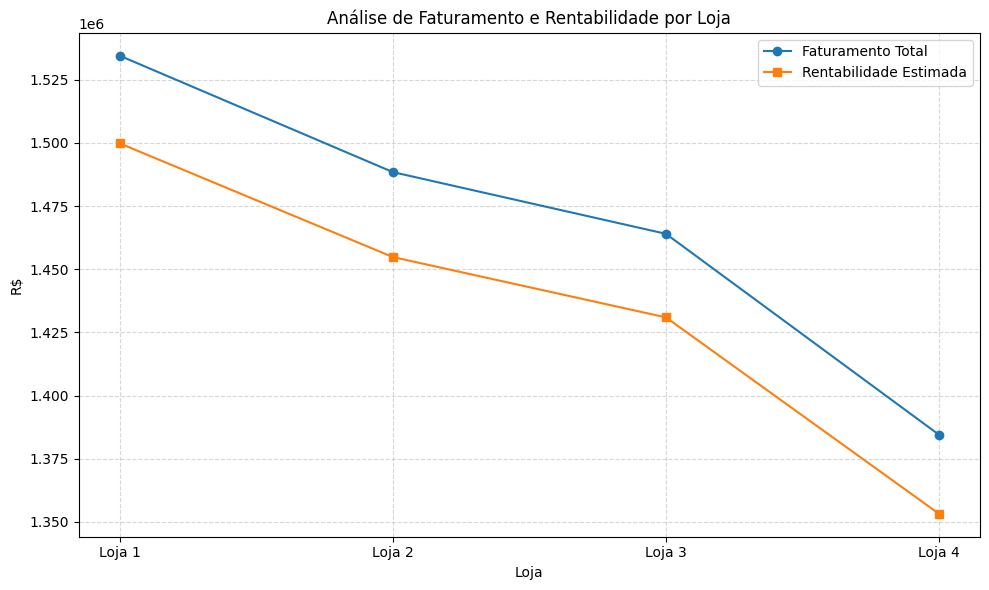

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
custo_frete_medio = [34.69, 33.62, 33.07, 31.28]
frete_estimado = [v * 1000 for v in custo_frete_medio]
rentabilidade = [f - fr for f, fr in zip(faturamento, frete_estimado)]

df = pd.DataFrame({
    'Loja': lojas,
    'Faturamento': faturamento,
    'Rentabilidade': rentabilidade
})

plt.figure(figsize=(10, 6))
plt.plot(df['Loja'], df['Faturamento'], marker='o', label='Faturamento Total')
plt.plot(df['Loja'], df['Rentabilidade'], marker='s', label='Rentabilidade Estimada')
plt.title('An√°lise de Faturamento e Rentabilidade por Loja')
plt.xlabel('Loja')
plt.ylabel('R$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


üìä Relat√≥rio de An√°lise de Vendas e Desempenho por Loja

1. Analise do Faturamento
A an√°lise dos dados revelou que a Loja 1 possui o maior faturamento entre todas, seguida pelas Lojas 2 e 3. A Loja 4, por sua vez, apresentou o menor percentual de faturamento, o que indica uma menor representatividade no volume financeiro total das vendas.

2. Vendas por Categoria
As categorias com menor volume de vendas foram:
Instrumentos Musicais
Livros
Utilidades Dom√©sticas

Apesar de uma distribui√ß√£o relativamente proporcional entre as lojas, a Loja 4 obteve o menor desempenho por categoria, com apenas 24,99% das vendas totais, refor√ßando sua baixa participa√ß√£o no mercado analisado.

3. M√©dia de Avalia√ß√£o por Loja
A m√©dia das avalia√ß√µes atribu√≠das pelos clientes mostra os seguintes destaques:

Loja 1 apresentou a menor m√©dia de avalia√ß√£o, indicando poss√≠vel necessidade de melhorias na experi√™ncia do cliente.

Loja 4 teve desempenho semelhante, tamb√©m com nota inferior √†s demais lojas.

Esse resultado pode estar relacionado √† qualidade dos produtos, prazos de entrega ou atendimento p√≥s-venda.

4. Produtos Mais e Menos Vendidos
Cada loja demonstrou tend√™ncias distintas de consumo, com varia√ß√£o nos produtos mais e menos vendidos. Isso sugere que o p√∫blico de cada loja possui prefer√™ncias espec√≠ficas.

5. Frete Medio por Loja
Em rela√ß√£o ao custo m√©dio de frete por loja:
A Loja 1 registrou o maior custo m√©dio, o que pode estar relacionado a maior volume de entregas
A Loja 4 teve o menor custo m√©dio, destacando-se pela efici√™ncia log√≠stica ou localiza√ß√£o dos clientes.

6. Decis√£o Final

Vender a Loja 4:
Pois tem o menor faturamento e menor rentabilidade.
Apesar do frete mais barato e avalia√ß√£o razo√°vel, ela √© a menos lucrativa.
A venda dessa loja liberaria capital para investir nas lojas mais rent√°veis (Loja 1 ou 3).
Ent√£o vender a loja 4 seria a decis√£o mais estrategica.

